In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset
cifar10_ds = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [3]:
!pip install contrastive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 64.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 47.6 MB/s eta 0:00:0000:0100:01m
  Created wheel for contrastive: filename=contrastive-1.2.0-py3-none-any.whl size=6899 sha256=b68c1eaa583586de70f61db792a0329dd36600c5864994b58f2662e25ea88747
  Stored in directory: /root/.cache/pip/wheels

In [4]:
print(cifar10_ds)

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


In [5]:
from sklearn.decomposition import PCA
import numpy as np

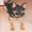

5

In [6]:
index = 10
cifar10_ds['train'][index]['img'].show()
cifar10_ds['train'][index]['img'].size
cifar10_ds['train'][index]['label']

In [7]:
np.asarray(cifar10_ds['train'][index]['img']).flatten().shape

(3072,)

In [8]:
import random

### Demo Quickstart

In [9]:
X_target = list()
X_label = list()
X_background = list()
TARGET_LABEL_LIST = [0,1]
for i in random.sample(range(10000),2000):
    label = cifar10_ds['train'][i]['label']
    img_flat = np.asarray(cifar10_ds['train'][i]['img']).flatten()
    if label in TARGET_LABEL_LIST:
        X_target.append(img_flat)
        X_label.append(label)
    else:
        X_background.append(img_flat)

X_target = np.asarray(X_target)
X_label = np.asarray(X_label)
X_background = np.asarray(X_background)

print(X_target.shape)
print(X_label.shape)
print(X_background.shape)

(397, 3072)
(397,)
(1603, 3072)


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_target)
print(X_pca.shape)

(397, 2)


In [11]:
from contrastive import CPCA

cpca = CPCA()
X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])

In [12]:
X_cpca = np.real(np.asarray(X_cpca))
print(X_cpca.shape)

(4, 397, 2)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_pca, X_label, cv=5)
print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.655 +/- 0.026


In [14]:
X_cpca[0].shape

(397, 2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

for i in range(4):
    knn = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X_cpca[i], X_label, cv=5)
    print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.652 +/- 0.025
Accuracy: 0.554 +/- 0.081
Accuracy: 0.579 +/- 0.068
Accuracy: 0.549 +/- 0.029


In [16]:
results_list = list()

for i in range(10):
    for j in range(10):
        tmp_dict = {
            'no_preprocessing':None,
            'PCA':None,
            'cPCA-0':None,
            'cPCA-1':None,
            'cPCA-2':None,
            'cPCA-3':None,
            'name':f"{i} AND {j}"
        }
        X_target = list()
        X_label = list()
        X_background = list()
        if i>j:
            TARGET_LABEL_LIST = [i,j]
            for l in random.sample(range(10000),2000):
                label = cifar10_ds['train'][l]['label']
                img_flat = np.asarray(cifar10_ds['train'][l]['img']).flatten()
                if label in TARGET_LABEL_LIST:
                    X_target.append(img_flat)
                    X_label.append(label)
                else:
                    X_background.append(img_flat)
            X_target = np.asarray(X_target)
            X_label = np.asarray(X_label)
            X_background = np.asarray(X_background)
            print("sample complete")
            print(f"label: {TARGET_LABEL_LIST}")
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_target)
            print(X_pca.shape)
            print("PCA complete")
            cpca = CPCA()
            X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])
            X_cpca = np.real(X_cpca)
            print("CPCA complete")
            print("No preprocessing score")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_target, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['no_preprocessing']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("PCA scores")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_pca, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['PCA']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("cPCA scores")
            for k in range(4):
                knn = KNeighborsClassifier(n_neighbors=5)
                scores = cross_val_score(knn, X_cpca[k], X_label, cv=5)
                print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
                tmp_dict['cPCA-'+str(k)]=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print()
            results_list.append(tmp_dict)
            # raise KeyError

sample complete
label: [1, 0]
(377, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.631 +/- 0.028
PCA scores
Accuracy: 0.578 +/- 0.031
cPCA scores
Accuracy: 0.576 +/- 0.022
Accuracy: 0.631 +/- 0.028
Accuracy: 0.61 +/- 0.061
Accuracy: 0.549 +/- 0.041

sample complete
label: [2, 0]
(406, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.754 +/- 0.052
PCA scores
Accuracy: 0.626 +/- 0.033
cPCA scores
Accuracy: 0.631 +/- 0.05
Accuracy: 0.564 +/- 0.058
Accuracy: 0.502 +/- 0.028
Accuracy: 0.51 +/- 0.061

sample complete
label: [2, 1]
(399, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.629 +/- 0.022
PCA scores
Accuracy: 0.596 +/- 0.03
cPCA scores
Accuracy: 0.624 +/- 0.041
Accuracy: 0.644 +/- 0.044
Accuracy: 0.669 +/- 0.043
Accuracy: 0.566 +/- 0.088

sample complete
label: [3, 0]
(382, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.754 +/- 0.038
PCA scores
Accuracy: 0.652 +/- 0.053
cPCA scores
Accuracy: 0.641 +/- 0.049
Accurac

In [17]:
import pandas as pd
df = pd.DataFrame(results_list)
df

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3,name
0,0.631 +/- 0.028,0.578 +/- 0.031,0.576 +/- 0.022,0.631 +/- 0.028,0.61 +/- 0.061,0.549 +/- 0.041,1 AND 0
1,0.754 +/- 0.052,0.626 +/- 0.033,0.631 +/- 0.05,0.564 +/- 0.058,0.502 +/- 0.028,0.51 +/- 0.061,2 AND 0
2,0.629 +/- 0.022,0.596 +/- 0.03,0.624 +/- 0.041,0.644 +/- 0.044,0.669 +/- 0.043,0.566 +/- 0.088,2 AND 1
3,0.754 +/- 0.038,0.652 +/- 0.053,0.641 +/- 0.049,0.704 +/- 0.051,0.508 +/- 0.031,0.49 +/- 0.042,3 AND 0
4,0.728 +/- 0.069,0.591 +/- 0.065,0.625 +/- 0.043,0.562 +/- 0.053,0.63 +/- 0.06,0.526 +/- 0.036,3 AND 1
5,0.605 +/- 0.036,0.552 +/- 0.051,0.552 +/- 0.063,0.595 +/- 0.044,0.535 +/- 0.032,0.542 +/- 0.038,3 AND 2
6,0.773 +/- 0.056,0.693 +/- 0.052,0.641 +/- 0.049,0.612 +/- 0.04,0.47 +/- 0.032,0.499 +/- 0.063,4 AND 0
7,0.657 +/- 0.048,0.687 +/- 0.053,0.69 +/- 0.068,0.755 +/- 0.012,0.575 +/- 0.064,0.537 +/- 0.059,4 AND 1
8,0.583 +/- 0.034,0.543 +/- 0.023,0.541 +/- 0.064,0.543 +/- 0.024,0.483 +/- 0.028,0.543 +/- 0.052,4 AND 2
9,0.617 +/- 0.056,0.516 +/- 0.028,0.491 +/- 0.031,0.555 +/- 0.027,0.495 +/- 0.07,0.493 +/- 0.045,4 AND 3


In [18]:
def color_format(s):
    original_acc = get_acc(s['no_preprocessing'])
    # print(original_acc)
    is_max = s == s.max()
    color_list = []
    for i in s:
        # print(f'hi: {i}')
        if get_acc(i) <= original_acc:
            color_list.append('background-color: white')
        else:
            color_list.append('background-color: rgb(100,255,100)')
    return color_list

def get_acc(x):
    return float(x.split('+/-')[0].strip())
# results_df = pd.DataFrame(results_list)
df.set_index("name", inplace=True)
df.style.apply(color_format, axis=1)

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3
name,,,,,,
1 AND 0,0.631 +/- 0.028,0.578 +/- 0.031,0.576 +/- 0.022,0.631 +/- 0.028,0.61 +/- 0.061,0.549 +/- 0.041
2 AND 0,0.754 +/- 0.052,0.626 +/- 0.033,0.631 +/- 0.05,0.564 +/- 0.058,0.502 +/- 0.028,0.51 +/- 0.061
2 AND 1,0.629 +/- 0.022,0.596 +/- 0.03,0.624 +/- 0.041,0.644 +/- 0.044,0.669 +/- 0.043,0.566 +/- 0.088
3 AND 0,0.754 +/- 0.038,0.652 +/- 0.053,0.641 +/- 0.049,0.704 +/- 0.051,0.508 +/- 0.031,0.49 +/- 0.042
3 AND 1,0.728 +/- 0.069,0.591 +/- 0.065,0.625 +/- 0.043,0.562 +/- 0.053,0.63 +/- 0.06,0.526 +/- 0.036
3 AND 2,0.605 +/- 0.036,0.552 +/- 0.051,0.552 +/- 0.063,0.595 +/- 0.044,0.535 +/- 0.032,0.542 +/- 0.038
4 AND 0,0.773 +/- 0.056,0.693 +/- 0.052,0.641 +/- 0.049,0.612 +/- 0.04,0.47 +/- 0.032,0.499 +/- 0.063
4 AND 1,0.657 +/- 0.048,0.687 +/- 0.053,0.69 +/- 0.068,0.755 +/- 0.012,0.575 +/- 0.064,0.537 +/- 0.059
4 AND 2,0.583 +/- 0.034,0.543 +/- 0.023,0.541 +/- 0.064,0.543 +/- 0.024,0.483 +/- 0.028,0.543 +/- 0.052


### Using OpenAI Clip

In [10]:
!pip install transformers

from transformers import pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 28.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 66.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [11]:
pipe = pipeline("zero-shot-image-classification", model="openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [13]:
help(pipe)

Help on ZeroShotImageClassificationPipeline in module transformers.pipelines.zero_shot_image_classification object:

class ZeroShotImageClassificationPipeline(transformers.pipelines.base.Pipeline)
 |  ZeroShotImageClassificationPipeline(**kwargs)
 |  
 |  Zero shot image classification pipeline using `CLIPModel`. This pipeline predicts the class of an image when you
 |  provide an image and a set of `candidate_labels`.
 |  
 |  Example:
 |  
 |  ```python
 |  >>> from transformers import pipeline
 |  
 |  >>> classifier = pipeline(model="google/siglip-so400m-patch14-384")
 |  >>> classifier(
 |  ...     "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png",
 |  ...     candidate_labels=["animals", "humans", "landscape"],
 |  ... )
 |  [{'score': 0.965, 'label': 'animals'}, {'score': 0.03, 'label': 'humans'}, {'score': 0.005, 'label': 'landscape'}]
 |  
 |  >>> classifier(
 |  ...     "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png",
 |  ... 

In [30]:
from pprint import pprint
sample_pred = pipe(cifar10_ds['train'][0]['img'], candidate_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
pprint(sample_pred)

[{'label': 'airplane', 'score': 0.9744154214859009},
 {'label': 'bird', 'score': 0.012951435521245003},
 {'label': 'ship', 'score': 0.008248009718954563},
 {'label': 'automobile', 'score': 0.0018931111553683877},
 {'label': 'dog', 'score': 0.000702335499227047},
 {'label': 'truck', 'score': 0.0006072412943467498},
 {'label': 'cat', 'score': 0.0004406006191857159},
 {'label': 'deer', 'score': 0.00033803354017436504},
 {'label': 'horse', 'score': 0.00031132795265875757},
 {'label': 'frog', 'score': 9.248455171473324e-05}]


In [24]:
print(cifar10_ds['train'][0]['img'])
print(cifar10_ds['train'][0]['label'])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7F0350D42E00>
0


### Binary Classification Using Clip
+ Target dataset is either label 0 (airplane) or 1 (automobile)
+ For the background dataset, we want to only use instances where the score for label 0 or 1 is larger than a threshold

In [65]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)


inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
output = model(**inputs)

In [64]:
inputs['input_ids']

tensor([[49406,   320,  1125,   539,   320,  2368, 49407],
        [49406,   320,  1125,   539,   320,  1929, 49407]])

In [68]:
output.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [72]:
output['vision_model_output']

BaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.1391,  0.1016, -0.2362,  ...,  0.1568,  0.2143,  0.2181],
         [ 0.1976,  0.4183, -0.8494,  ...,  0.1030,  1.4616,  0.4321],
         [ 0.1630,  0.2004, -1.0608,  ..., -0.0640,  1.3778,  0.5354],
         ...,
         [ 0.0552, -0.0113, -0.6040,  ...,  0.2935,  1.0303, -0.0316],
         [ 0.1673,  0.0491, -0.3833,  ...,  0.3797,  0.9275, -0.0212],
         [ 0.1937,  0.2567, -0.4325,  ...,  0.2957,  1.2151, -0.0417]]],
       grad_fn=<AddBackward0>), pooler_output=tensor([[-3.5264e-01,  4.3304e-02, -7.5685e-01, -8.6568e-01,  5.1499e-01,
         -8.6238e-01,  3.0487e-01,  1.0063e+00,  4.8464e-01,  4.2416e-01,
          2.1265e+00, -6.3059e-01, -2.0583e+00,  4.7908e-02,  2.4651e-01,
          1.5391e-01,  1.1603e+00,  9.8606e-01,  1.1290e+00, -6.3667e-01,
          3.4923e-01,  9.5762e-01,  3.4354e-01,  1.7032e-01,  2.7315e-01,
         -1.5358e-01,  3.5460e-01, -3.6673e-01,  2.2665e-01,  1.4825e+00,
         -5.5609e+00,  

In [35]:
from tqdm import trange

X_target = []
X_background = []
y_target = []
y_background = []

THRESHOLD = 1e-2

for i in trange(100):
    if cifar10_ds['train'][i]['label'] in [0,1]:
        X_target.append(np.asarray(cifar10_ds['train'][i]['img']).flatten())
        y_target.append(cifar10_ds['train'][i]['label'])
    else:
        sample_pred = pipe(cifar10_ds['train'][i]['img'], candidate_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
        for tmp_dict in sample_pred:
            if tmp_dict['label'] in ['airplane', 'automobile'] and tmp_dict['score'] > THRESHOLD:
                X_background.append(np.asarray(cifar10_ds['train'][i]['img']).flatten())

X_target = np.asarray(X_target)
y_target = np.asarray(y_target)
X_background = np.asarray(X_background)

print(X_target.shape)
print(y_target.shape)
print(X_background.shape)

# TODO: save clip embeddings as a file (i.e. pickle or .pt, and then upload + cos similarity) // ViT

100%|██████████| 100/100 [00:41<00:00,  2.40it/s]

(22, 3072)
(22,)
(62, 3072)


In [44]:
from contrastive import CPCA

cpca = CPCA()
X_cpca = cpca.fit_transform(X_target[:,0:1000], X_background[:,0:1000])
X_cpca = np.asarray(X_cpca)
print(X_cpca.shape)

(4, 22, 2)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in range(4):
    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_target, y_target, cv=5)
    print(np.mean(scores))

0.27
0.27
0.27
0.27


### Using Google ViT

In [47]:
google_vit_pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

In [48]:
help(google_vit_pipe)

Help on ImageClassificationPipeline in module transformers.pipelines.image_classification object:

class ImageClassificationPipeline(transformers.pipelines.base.Pipeline)
 |  ImageClassificationPipeline(*args, **kwargs)
 |  
 |  Image classification pipeline using any `AutoModelForImageClassification`. This pipeline predicts the class of an
 |  image.
 |  
 |  Example:
 |  
 |  ```python
 |  >>> from transformers import pipeline
 |  
 |  >>> classifier = pipeline(model="microsoft/beit-base-patch16-224-pt22k-ft22k")
 |  >>> classifier("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png")
 |  [{'score': 0.442, 'label': 'macaw'}, {'score': 0.088, 'label': 'popinjay'}, {'score': 0.075, 'label': 'parrot'}, {'score': 0.073, 'label': 'parodist, lampooner'}, {'score': 0.046, 'label': 'poll, poll_parrot'}]
 |  ```
 |  
 |  Learn more about the basics of using a pipeline in the [pipeline tutorial](../pipeline_tutorial)
 |  
 |  This image classification pipeline can currentl